# ___

# [ Machine Learning in Geosciences ]


---

Lecturer: *Lukas Brodsky lukas.brodsky@natur.cuni.cz*

**Department of Applied Geoinformatics and Carthography, Charles University** 

___

# Rasterio

Working with rasters in Python! 

## Documentation

    
Please refer to **[Rasterio official documentation](https://rasterio.readthedocs.io/en/stable/)**



## 1. Reading raster

### Library import

In [ ]:
# ! pip install rasterio 

# https://rasterio.readthedocs.io/en/stable/installation.html
# python -m pip install --user -U pip
# GDAL_CONFIG=/path/to/gdal-config python -m pip install --user --no-binary rasterio rasterio


In [1]:
import os
import rasterio
import numpy as np
print(rasterio.__version__)

import matplotlib.pyplot as plt

1.3.9


### Data

In [ ]:
os.listdir()

In [2]:
# CHANGE TO YOUR PATH!!!
path = 'C:\\Users\\uzivatel\\Documents\\GitHub\Machine_learning\\10_11_LAB_GeoAI_GeoPython\\GeoPython'
# path = 'C:\Downloads\Machine Learning\data' -> WRONG! 
# path = 'C:\\Downloads\\Machine_Learning\\data' -> GOOD 
#filename = 'S2A_T33UVR_20180703T101029.tif'
filename = 'landsat.tif'
fnpath = os.path.join(path, filename)
os.path.isfile(fnpath)

True

In [3]:
print(fnpath)

C:\Users\uzivatel\Documents\GitHub\Machine_learning\10_11_LAB_GeoAI_GeoPython\GeoPython\landsat.tif


In [4]:
# Read the iamge 
ds = rasterio.open(fnpath)
ds

<open DatasetReader name='C:/Users/uzivatel/Documents/GitHub/Machine_learning/10_11_LAB_GeoAI_GeoPython/GeoPython/landsat.tif' mode='r'>

### Metadata

In [5]:
print(f'Dataset: {ds}')
print(f'Typ datasetu: {type(ds)}')

Dataset: <open DatasetReader name='C:/Users/uzivatel/Documents/GitHub/Machine_learning/10_11_LAB_GeoAI_GeoPython/GeoPython/landsat.tif' mode='r'>
Typ datasetu: <class 'rasterio.io.DatasetReader'>


In [6]:
# Image metadata 
print(f'Bands: {ds.count}') # features for ML 
print(f'Image width: {ds.width}')
print(f'Image height: {ds.height}')

Bands: 6
Image width: 500
Image height: 500


In [7]:
# Raster file metadata 
meta = ds.meta
print(type(meta))
print('Metadata od the dataset: ...')
for k in meta:
    print(k, meta[k])

<class 'dict'>
Metadata od the dataset: ...
driver GTiff
dtype int16
nodata None
width 500
height 500
count 6
crs PROJCS["WGS 84 / UTM zone 21N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-57],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
transform | 30.00, 0.00, 624000.00|
| 0.00,-30.00, 7750000.00|
| 0.00, 0.00, 1.00|


In [8]:
# Bbox
print(f'Bbox: {ds.bounds}')

Bbox: BoundingBox(left=624000.0, bottom=7735000.0, right=639000.0, top=7750000.0)


In [ ]:
# Transformation parameters 
# print(f'Geotransformation parameters: {ds.transform}')

### Reading bands and applying map algebra 
(to be replaced by Machine Learning modelling in the next tasks)

In [9]:
B1 = ds.read(1)
print(f'Typ pole hodnot: {type(B1)}')

Typ pole hodnot: <class 'numpy.ndarray'>


In [10]:
B1.shape

(500, 500)

In [11]:
import matplotlib.pyplot as plt

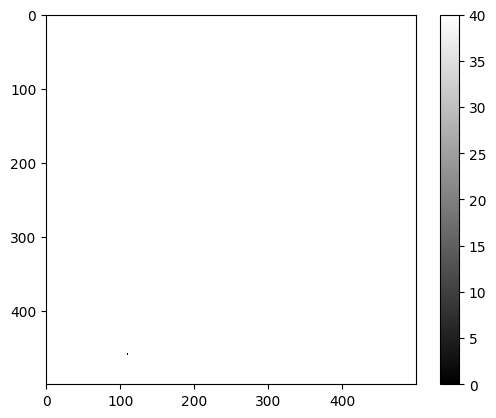

In [12]:
plt.imshow(B1, vmin=0, vmax=40, cmap='gray') 
plt.colorbar() 

In [13]:
# Read more bands and calculate NDVI
RED = ds.read(3).astype(np.float32) 
NIR = ds.read(4).astype(np.float32)
print(f'Data type: {RED.dtype}')

Data type: float32


In [ ]:
RED

In [14]:
# NDVI calculation
NDVI = (NIR - RED) / (NIR + RED)
print(type(NDVI))
print(NDVI.min(), NDVI.max())

<class 'numpy.ndarray'>
-3.625 3.3529413


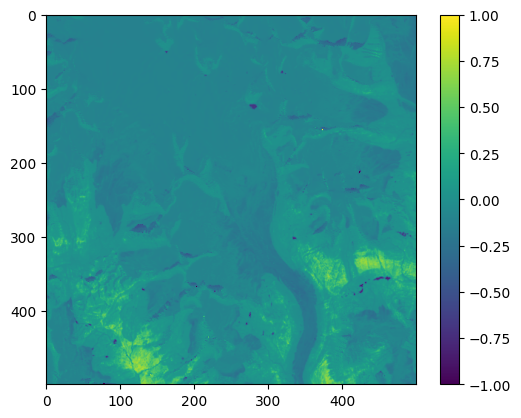

In [16]:
plt.imshow(NDVI, vmin=0.0, vmax=0.8)
plt.colorbar()

## 2. Writing raster file 

In [17]:
# prepare metadata
meta = ds.meta
print(f'Metadata datasetu: {meta}')

Metadata datasetu: {'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 500, 'height': 500, 'count': 6, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 21N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-57],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(30.0, 0.0, 624000.0,
       0.0, -30.0, 7750000.0)}


In [18]:
# update what is needed
meta["dtype"] = "float32"
meta['count'] = 1 # 1 band

In [19]:
print(f'Metadata datasetu: {meta}')

Metadata datasetu: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 500, 'height': 500, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 21N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-57],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(30.0, 0.0, 624000.0,
       0.0, -30.0, 7750000.0)}


In [20]:
# write the raster 
out_pthfn = os.path.join(path, 'landsat_ndvi.tif')

with rasterio.open(out_pthfn, 'w', **meta) as dst:
    dst.write_band(1, NDVI) 

In [22]:
if os.path.isfile(out_pthfn):
    print('File landsat_ndvi.tif is written to the filesystem.')
    print(f"The size is: {os.path.getsize(out_pthfn) / 1000000} MB.")


File landsat_ndvi.tif is written to the filesystem.
The size is: 1.001287 MB.
